In [2]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [15]:
dev = qml.device('lightning.qubit', wires=1)

In [20]:
@qml.qnode(dev)
def circuit(theta):
    qml.PauliX(wires=0)
    qml.RY(theta, wires=0)
    return qml.expval(qml.PauliZ(0))

In [21]:
circuit(0.1)

array(-0.99500417)

In [24]:
thetas = np.linspace(-np.pi, np.pi, 50)
measurements = []

for theta in thetas:
    measurements.append(circuit(theta))
measurements

[array(1.),
 array(0.99179001),
 array(0.96729486),
 array(0.92691676),
 array(0.8713187),
 array(0.80141362),
 array(0.71834935),
 array(0.6234898),
 array(0.51839257),
 array(0.40478334),
 array(0.28452759),
 array(0.1595999),
 array(0.03205158),
 array(-0.09602303),
 array(-0.22252093),
 array(-0.34536505),
 array(-0.46253829),
 array(-0.57211666),
 array(-0.67230089),
 array(-0.76144596),
 array(-0.8380881),
 array(-0.90096887),
 array(-0.94905575),
 array(-0.98155916),
 array(-0.99794539),
 array(-0.99794539),
 array(-0.98155916),
 array(-0.94905575),
 array(-0.90096887),
 array(-0.8380881),
 array(-0.76144596),
 array(-0.67230089),
 array(-0.57211666),
 array(-0.46253829),
 array(-0.34536505),
 array(-0.22252093),
 array(-0.09602303),
 array(0.03205158),
 array(0.1595999),
 array(0.28452759),
 array(0.40478334),
 array(0.51839257),
 array(0.6234898),
 array(0.71834935),
 array(0.80141362),
 array(0.8713187),
 array(0.92691676),
 array(0.96729486),
 array(0.99179001),
 array(1.)]

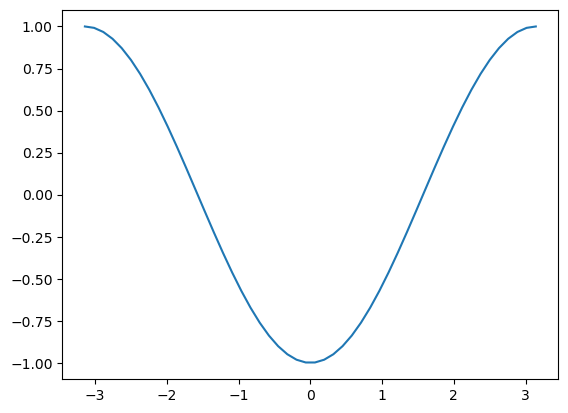

In [26]:
fig, ax = plt.subplots()
ax.plot(thetas, measurements)

In [29]:
theta = np.array([-2], requires_grad=True)

In [30]:
opt = qml.GradientDescentOptimizer(stepsize=0.1)

In [31]:
n_it = 100

for it in range(n_it):
    theta, prev_cost = opt.step_and_cost(circuit, theta)
    if it%10==0:
        print(f'Theta: {theta}, Cost: {circuit(theta)}')

Theta: [-2.], Cost: 0.4161468365471423
Theta: [-1.03886544], Cost: -0.507198377134105
Theta: [-0.39883261], Cost: -0.9215149712781964
Theta: [-0.14098266], Cost: -0.9900783947884957
Theta: [-0.0492414], Cost: -0.9987878872207129
Theta: [-0.01717298], Cost: -0.9998525480120855
Theta: [-0.005988], Cost: -0.9999820719882673
Theta: [-0.00208789], Cost: -0.9999978203532067
Theta: [-0.000728], Cost: -0.9999997350055523
Theta: [-0.00025384], Cost: -0.9999999677828575
